In [1]:
import sys
# add the code path
sys.path.append('..')

In [2]:
%load_ext autoreload
%autoreload 2

## Sample to train Yolo for object detection

In [3]:
from ultrayolo import YoloV3, callbacks
from ultrayolo import dataloaders
from pathlib import Path
import tensorflow as tf
from ultrayolo import losses
import matplotlib.pyplot as plt

Define the parameters for the run

In [4]:
image_shape = (256,256,3)
batch_shape = 4
max_objects = 100
train_dataset_path = '../tests/data/manifest.txt'
anchors = dataloaders.load_anchors('../tests/data/yolov3_anchors.txt')
classes = dataloaders.load_classes('../tests/data/classes.txt')

Create the model

In [5]:
model = YoloV3(image_shape, max_objects, 
               anchors=anchors, num_classes=len(classes), 
               training=True, backbone='ResNet50V2')

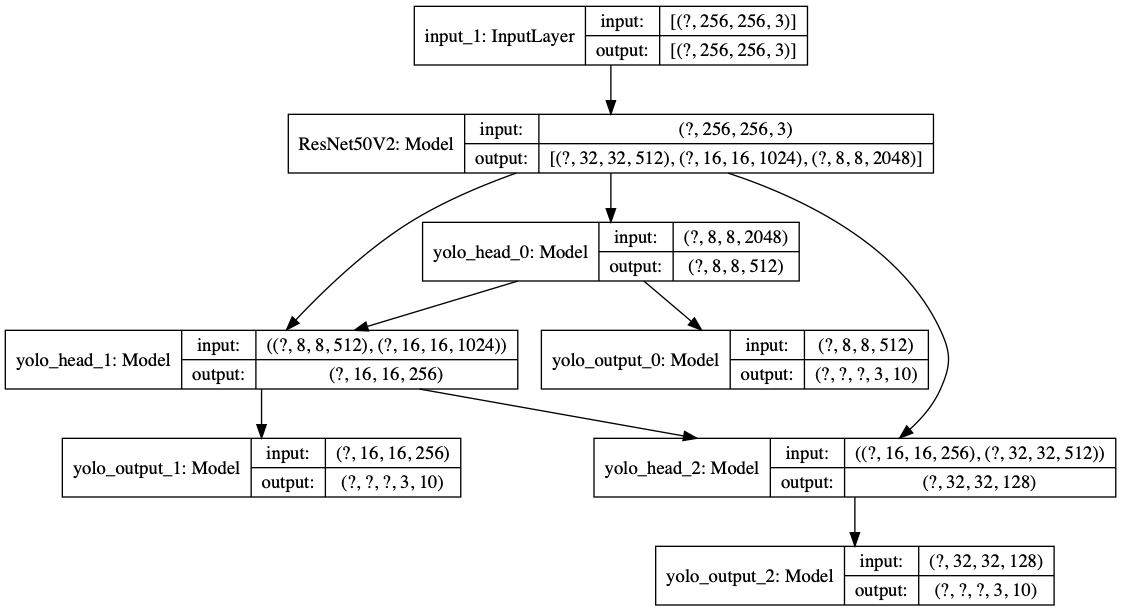

In [6]:
tf.keras.utils.plot_model(model.model, show_shapes=True)

Make optimizer and loss

In [7]:
optimizer = model.get_optimizer('adam', 1e-4)
model_loss = model.get_loss_function()

I0113 17:38:51.539930 4526538176 ultrayolo.py:131] using adam optimize


In [8]:
model_loss

[yolo_loss0 at 0x14dd02978,
 yolo_loss1 at 0x14dd029e8,
 yolo_loss2 at 0x14dd02b38]

compile the model

In [9]:
model.compile(optimizer, model_loss, run_eagerly=True, summary=False)

Create the dataset

In [10]:
train_dataset = dataloaders.YoloDatasetMultiFile(
    train_dataset_path, image_shape, max_objects, batch_shape, 
    model.anchors, model.masks, len(classes)
)

In [11]:
print('num batches', len(train_dataset))

num batches 1


Create the callbacks

In [12]:
model_callbacks = callbacks.default_callbacks(model,
    run_path='./checkpoints', lrate_mode='exp_range',
    lrate_value=1e-4, verbose=0)

Set the model in transfer mode

In [13]:
model.set_mode_transfer()

I0113 17:39:01.533802 4526538176 ultrayolo.py:150] freeze backbone


In [14]:
history = model.fit(train_dataset, train_dataset, 5, callbacks=model_callbacks)

I0113 17:39:02.124272 4526538176 ultrayolo.py:197] training for ../tests/data epochs on the dataset 5


Train for 1 steps, validate for 1 steps
Epoch 1/5
1/1 [==============================] - 7s 7s/step - loss: 1516.6597 - yolo_output_0_loss: 103.1665 - yolo_output_1_loss: 267.6844 - yolo_output_2_loss: 1058.4434 - val_loss: 1518.8828 - val_yolo_output_0_loss: 100.8544 - val_yolo_output_1_loss: 266.1116 - val_yolo_output_2_loss: 1064.5597
Epoch 2/5
1/1 [==============================] - 6s 6s/step - loss: 1475.6179 - yolo_output_0_loss: 82.2707 - yolo_output_1_loss: 262.1825 - yolo_output_2_loss: 1043.8076 - val_loss: 1518.4932 - val_yolo_output_0_loss: 100.7817 - val_yolo_output_1_loss: 266.0048 - val_yolo_output_2_loss: 1064.3588
Epoch 3/5
1/1 [==============================] - 7s 7s/step - loss: 1468.2029 - yolo_output_0_loss: 101.2909 - yolo_output_1_loss: 254.5640 - yolo_output_2_loss: 1025.0001 - val_loss: 1517.8242 - val_yolo_output_0_loss: 100.5758 - val_yolo_output_1_loss: 265.8470 - val_yolo_output_2_loss: 1064.0601
Epoch 4/5
1/1 [==============================] - 6s 6s/step -

## Evaluate model Loss

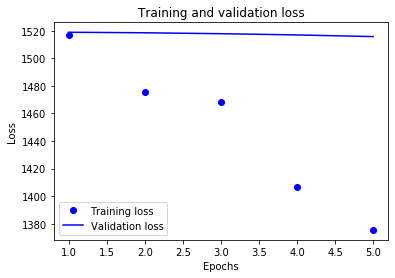

In [24]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Yolo loss for large-sized objects

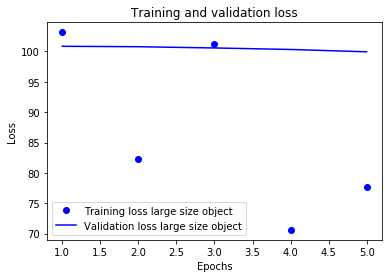

In [25]:
loss = history.history['yolo_output_0_loss']
val_loss = history.history['val_yolo_output_0_loss']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss large size object')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss large size object')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Yolo loss for medium-sized objects

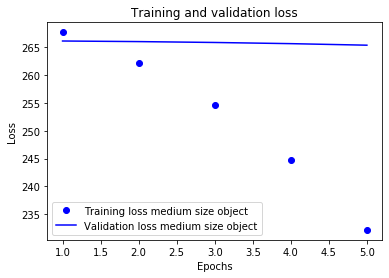

In [26]:
loss = history.history['yolo_output_1_loss']
val_loss = history.history['val_yolo_output_1_loss']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss medium size object')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss medium size object')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Yolo loss for small-sized objects

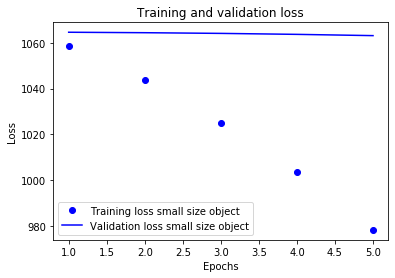

In [27]:
loss = history.history['yolo_output_2_loss']
val_loss = history.history['val_yolo_output_2_loss']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss small size object')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss small size object')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()